In [1]:
import pandas as pd
import numpy as np

from haversine import haversine 

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor



In [2]:
df = pd.read_csv("houses.csv",dtype={ "number_of_rooms": int,'year_of_completion': int,"floor":int, "number_of_floors": int})

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df

,latitude,longitude,material_of_building,type_of_furniture,square_meters,number_of_rooms,year_of_completion,floor,residential_complex,number_of_floors,type_of_building,smart_house,floor_heating,security,cost_in_dollars
0,49.82671,23.96620,brick house,good,50.0,1,2011,2,none,1,apartment,No,No,No,71000.0
1,49.82797,23.96685,brick house,good,48.0,2,2011,9,none,1,apartment,No,No,No,83000.0
2,49.81893,23.97047,brick house,none,72.8,2,2022,9,none,1,apartment,No,No,No,85000.0
3,49.82216,23.96818,brick house,none,85.4,2,2022,10,none,1,apartment,No,No,No,102000.0
4,49.81897,23.97048,brick house,medium,32.0,1,2011,1,none,1,apartment,No,No,No,37000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,49.87999,24.03591,insulated panel,good,69.0,3,1992,2,none,1,apartment,No,No,No,70000.0
1114,49.88061,24.03505,brick house,good,74.0,2,2005,1,none,1,apartment,No,No,No,73978.0
1115,49.88239,24.03767,brick house,good,20.0,1,2013,1,none,1,apartment,No,No,No,27500.0
1116,49.88235,24.03684,brick house,good,110.0,3,2013,5,none,2,apartment,No,No,No,95000.0


In [5]:
label_encoders_storage = {}
for col in df.columns:
    if df[col].dtype == 'object':
        if col not in label_encoders_storage:
            label_encoders_storage[col] = LabelEncoder()
            label_encoders_storage[col].fit(df[col].unique())
        df[col] = label_encoders_storage[col].transform(df[col])

In [7]:
df

,latitude,longitude,material_of_building,type_of_furniture,square_meters,number_of_rooms,year_of_completion,floor,residential_complex,number_of_floors,type_of_building,smart_house,floor_heating,security,cost_in_dollars
0,49.82671,23.96620,0,0,50.0,1,2011,2,2,1,0,0,0,0,71000.0
1,49.82797,23.96685,0,0,48.0,2,2011,9,2,1,0,0,0,0,83000.0
2,49.81893,23.97047,0,5,72.8,2,2022,9,2,1,0,0,0,0,85000.0
3,49.82216,23.96818,0,5,85.4,2,2022,10,2,1,0,0,0,0,102000.0
4,49.81897,23.97048,0,3,32.0,1,2011,1,2,1,0,0,0,0,37000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,49.87999,24.03591,3,0,69.0,3,1992,2,2,1,0,0,0,0,70000.0
1114,49.88061,24.03505,0,0,74.0,2,2005,1,2,1,0,0,0,0,73978.0
1115,49.88239,24.03767,0,0,20.0,1,2013,1,2,1,0,0,0,0,27500.0
1116,49.88235,24.03684,0,0,110.0,3,2013,5,2,2,0,0,0,0,95000.0


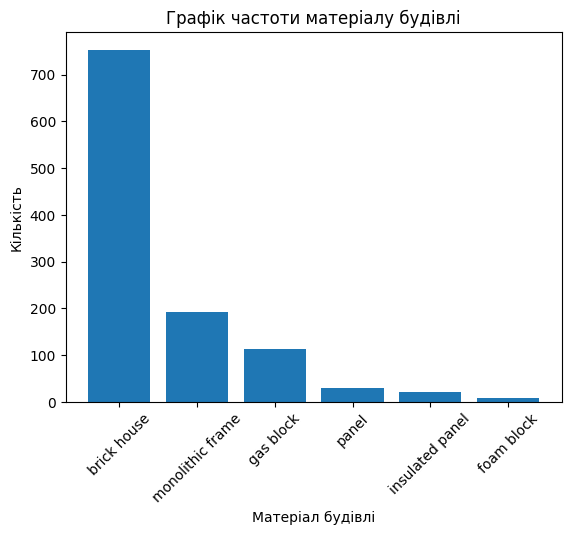

In [39]:
frequency = df['material_of_building'].value_counts()

plt.bar(frequency.index, frequency.values)
plt.xlabel('Матеріал будівлі')
plt.ylabel('Кількість')
plt.title('Графік частоти матеріалу будівлі')
plt.xticks(rotation=45)
plt.show()

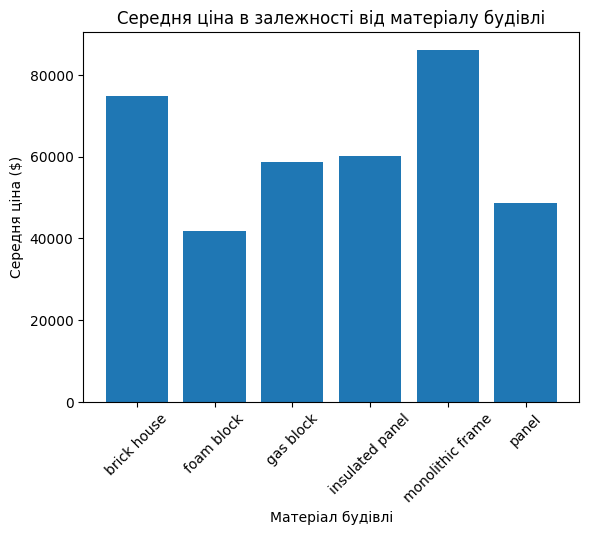

In [40]:
average_price = df.groupby('material_of_building')['cost_in_dollars'].mean()

# Побудова графіка
plt.bar(average_price.index, average_price.values)
plt.xlabel('Матеріал будівлі')
plt.ylabel('Середня ціна ($)')
plt.title('Середня ціна в залежності від матеріалу будівлі')
plt.xticks(rotation=45)
plt.show()

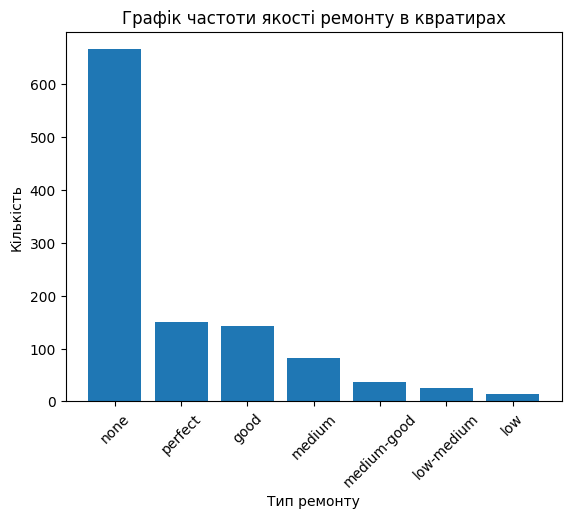

In [43]:
frequency = df['type_of_furniture'].value_counts()

plt.bar(frequency.index, frequency.values)
plt.xlabel('Тип ремонту')
plt.ylabel('Кількість')
plt.title('Графік частоти якості ремонту в квратирах')
plt.xticks(rotation=45)
plt.show()

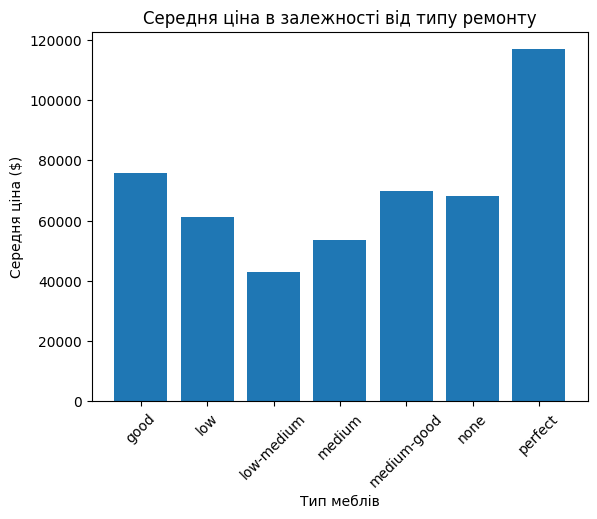

In [44]:
average_price = df.groupby('type_of_furniture')['cost_in_dollars'].mean()


plt.bar(average_price.index, average_price.values)
plt.xlabel('Тип меблів')
plt.ylabel('Середня ціна ($)')
plt.title('Середня ціна в залежності від типу ремонту')
plt.xticks(rotation=45)
plt.show()

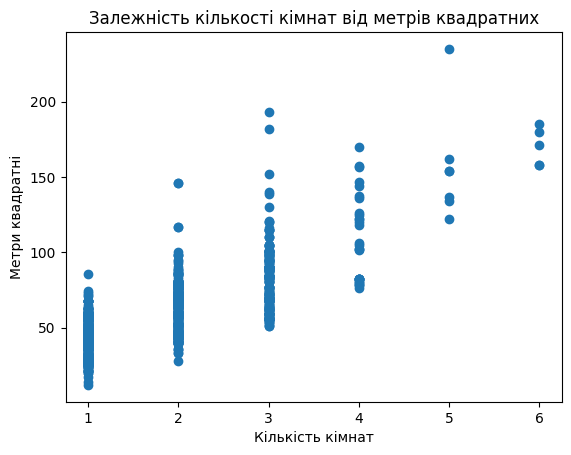

In [80]:


plt.scatter(df['number_of_rooms'], df['square_meters'])
plt.xlabel('Кількість кімнат')
plt.ylabel('Метри квадратні')
plt.title('Залежність кількості кімнат від метрів квадратних')
plt.show()



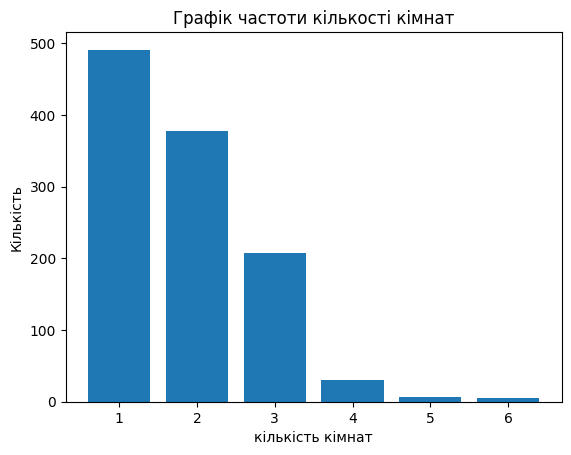

In [83]:
frequency = df['number_of_rooms'].value_counts()

plt.bar(frequency.index, frequency.values)
plt.xlabel('кількість кімнат')
plt.ylabel('Кількість')
plt.title('Графік частоти кількості кімнат')

plt.show()

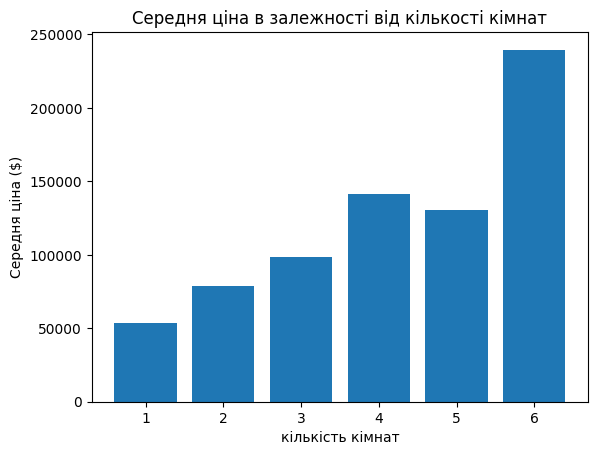

In [86]:
average_price = df.groupby('number_of_rooms')['cost_in_dollars'].mean()


plt.bar(average_price.index, average_price.values)
plt.xlabel('кількість кімнат')
plt.ylabel('Середня ціна ($)')
plt.title('Середня ціна в залежності від кількості кімнат')

plt.show()

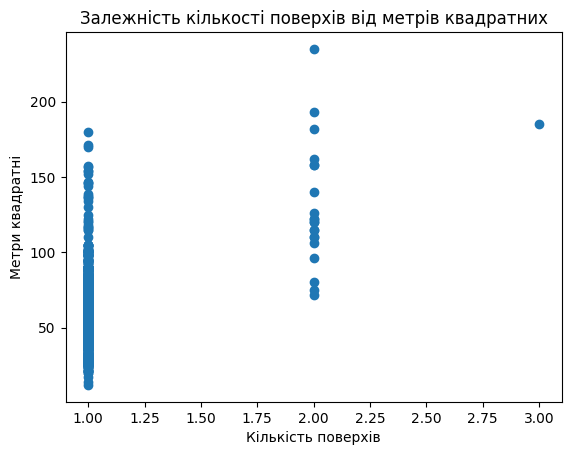

In [26]:
plt.scatter(df['number_of_floors'], df['square_meters'])
plt.xlabel('Кількість поверхів')
plt.ylabel('Метри квадратні')
plt.title('Залежність кількості поверхів від метрів квадратних')
plt.show()


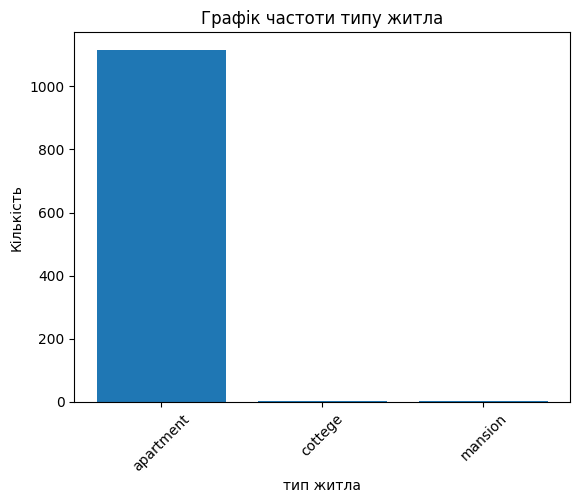

In [30]:
frequency = df['type_of_building'].value_counts()

plt.bar(frequency.index, frequency.values)
plt.xlabel('тип житла')
plt.ylabel('Кількість')
plt.title('Графік частоти типу житла')
plt.xticks(rotation=45)
plt.show()

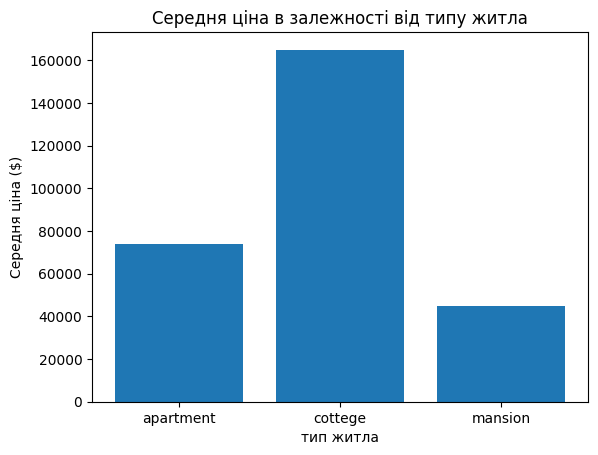

In [34]:
average_price = df.groupby('type_of_building')['cost_in_dollars'].mean()


plt.bar(average_price.index, average_price.values)
plt.xlabel('тип житла')
plt.ylabel('Середня ціна ($)')
plt.title('Середня ціна в залежності від типу житла')

plt.show()

In [38]:
df

,latitude,longitude,material_of_building,type_of_furniture,square_meters,number_of_rooms,year_of_completion,floor,residential_complex,number_of_floors,type_of_building,smart_house,floor_heating,security,cost_in_dollars
0,49.82671,23.96620,brick house,good,50.0,1,2011,2,none,1,apartment,No,No,No,71000.0
1,49.82797,23.96685,brick house,good,48.0,2,2011,9,none,1,apartment,No,No,No,83000.0
2,49.81893,23.97047,brick house,none,72.8,2,2022,9,none,1,apartment,No,No,No,85000.0
3,49.82216,23.96818,brick house,none,85.4,2,2022,10,none,1,apartment,No,No,No,102000.0
4,49.81897,23.97048,brick house,medium,32.0,1,2011,1,none,1,apartment,No,No,No,37000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,49.87999,24.03591,insulated panel,good,69.0,3,1992,2,none,1,apartment,No,No,No,70000.0
1114,49.88061,24.03505,brick house,good,74.0,2,2005,1,none,1,apartment,No,No,No,73978.0
1115,49.88239,24.03767,brick house,good,20.0,1,2013,1,none,1,apartment,No,No,No,27500.0
1116,49.88235,24.03684,brick house,good,110.0,3,2013,5,none,2,apartment,No,No,No,95000.0


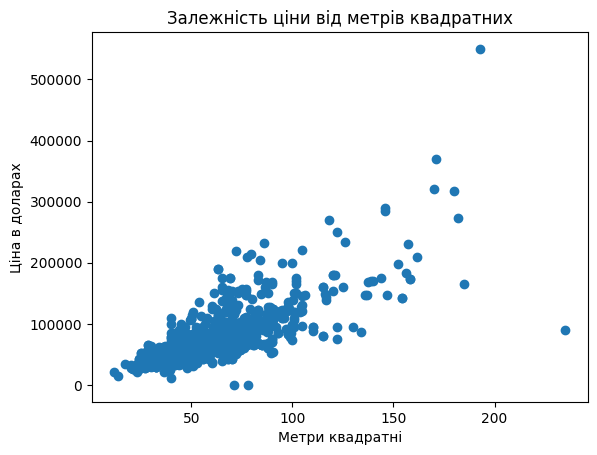

In [7]:
plt.scatter(df['square_meters'], df['cost_in_dollars'])
plt.xlabel('Метри квадратні')
plt.ylabel('Ціна в доларах')
plt.title('Залежність ціни від метрів квадратних')
plt.show();

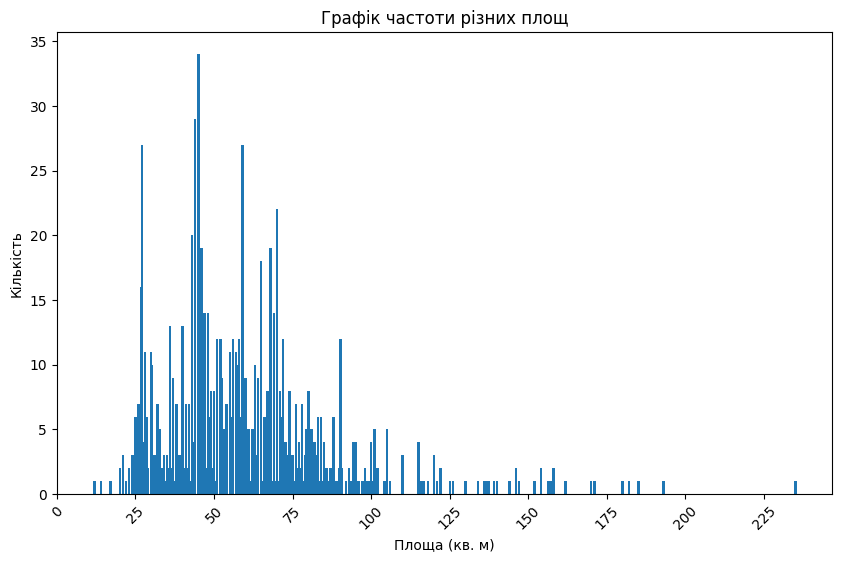

In [59]:
frequency = df['square_meters'].value_counts()


plt.figure(figsize=(10, 6))
plt.bar(frequency.index, frequency.values)
plt.xlabel('Площа (кв. м)')
plt.ylabel('Кількість')
plt.title('Графік частоти різних площ')
plt.xticks(rotation=45)
plt.xticks(range(0, int(max(frequency.index))+1, 25))
plt.show()

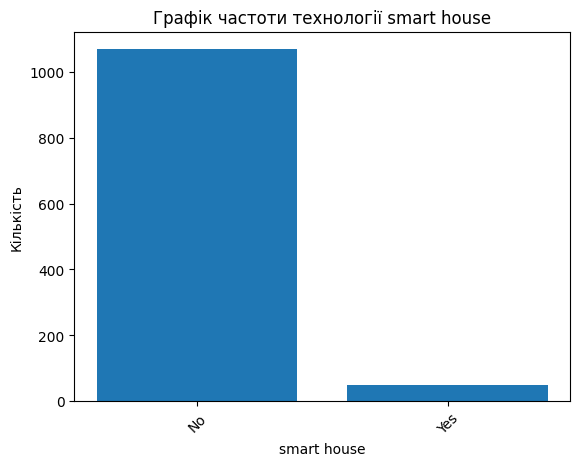

In [35]:
frequency = df['smart_house'].value_counts()

plt.bar(frequency.index, frequency.values)
plt.xlabel('smart house')
plt.ylabel('Кількість')
plt.title('Графік частоти технології smart house')
plt.xticks(rotation=45)
plt.show()

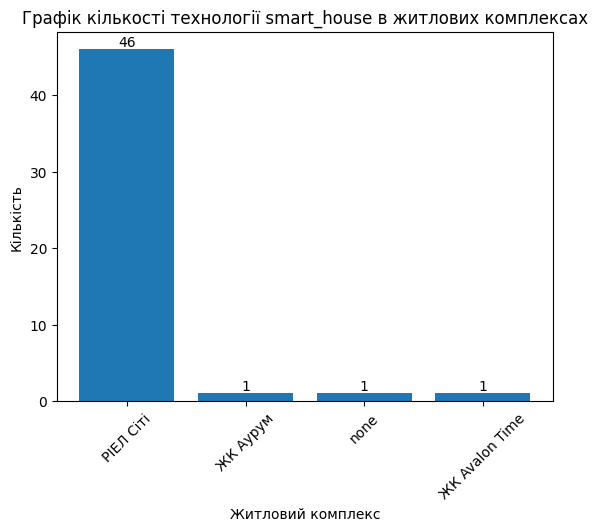

In [39]:
yes_residential_complex = df.loc[df['smart_house'] == 'Yes', 'residential_complex'].value_counts()

plt.bar(yes_residential_complex.index, yes_residential_complex.values)
plt.xlabel('Житловий комплекс')
plt.ylabel('Кількість')
plt.title('Графік кількості технології smart_house в житлових комплексах')
plt.xticks(rotation=45)

for i, value in enumerate(yes_residential_complex.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()floor_heating

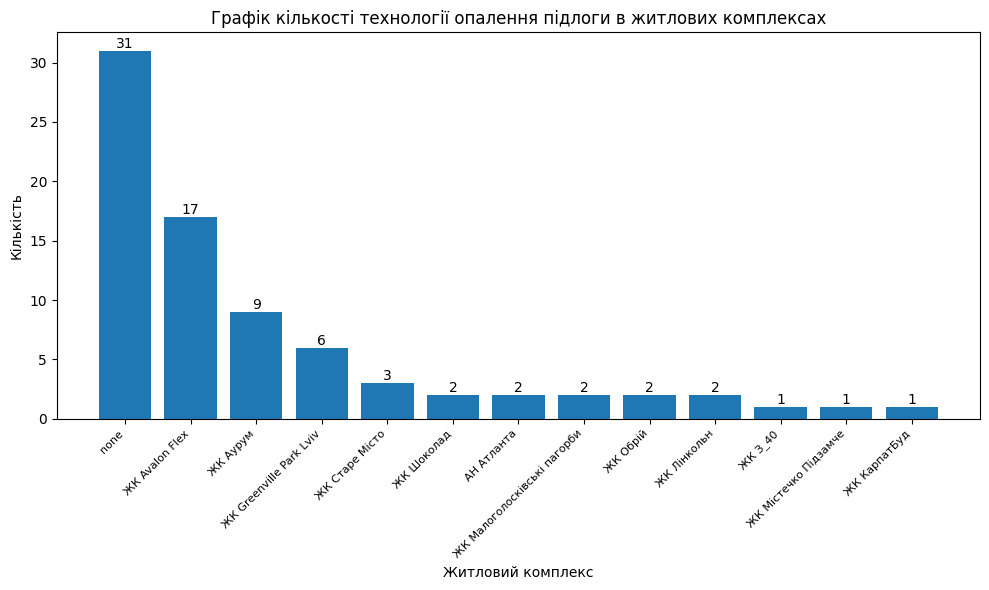

In [49]:
yes_residential_complex = df.loc[df['floor_heating'] == 'Yes', 'residential_complex'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(yes_residential_complex.index, yes_residential_complex.values)
plt.xlabel('Житловий комплекс')
plt.ylabel('Кількість')
plt.title('Графік кількості технології опалення підлоги в житлових комплексах')
plt.xticks(rotation=45, ha='right', fontsize=8)

for i, value in enumerate(yes_residential_complex.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

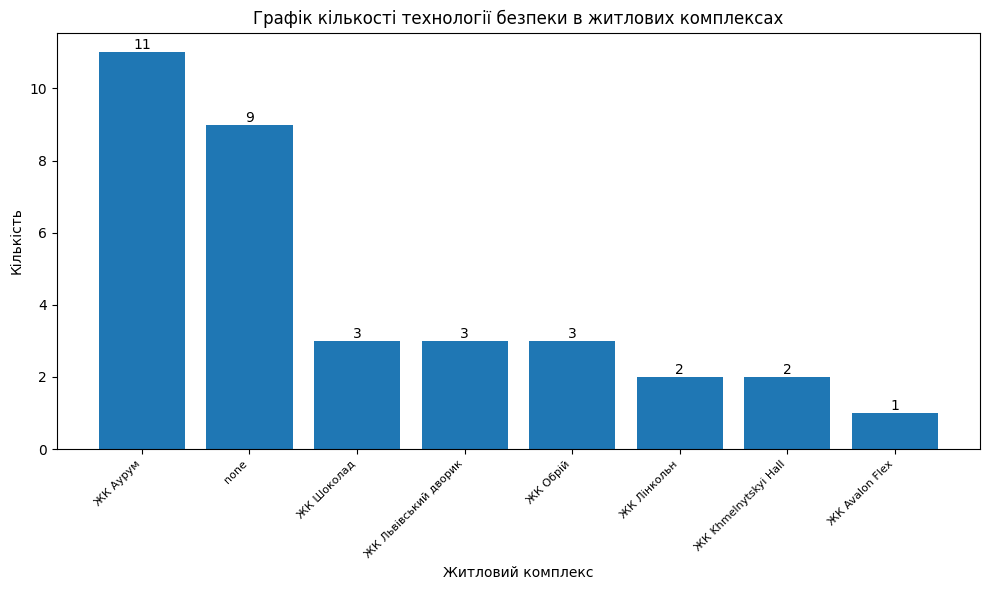

In [51]:
yes_residential_complex = df.loc[df['security'] == 'Yes', 'residential_complex'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(yes_residential_complex.index, yes_residential_complex.values)
plt.xlabel('Житловий комплекс')
plt.ylabel('Кількість')
plt.title('Графік кількості технології безпеки в житлових комплексах')
plt.xticks(rotation=45, ha='right', fontsize=8)

for i, value in enumerate(yes_residential_complex.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

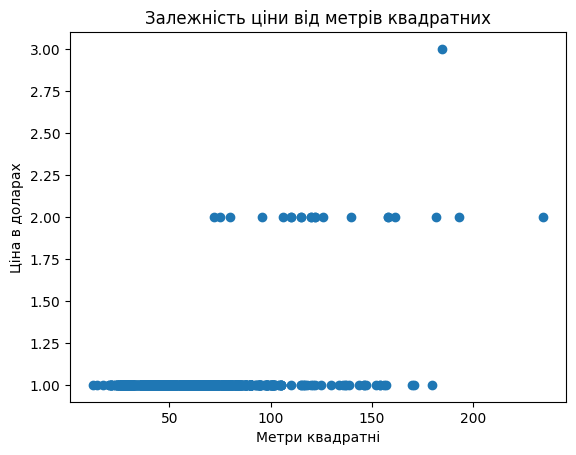

In [60]:
plt.scatter(df['square_meters'], df['number_of_floors'])
plt.xlabel('Метри квадратні')
plt.ylabel('Ціна в доларах')
plt.title('Залежність ціни від метрів квадратних')
plt.show();

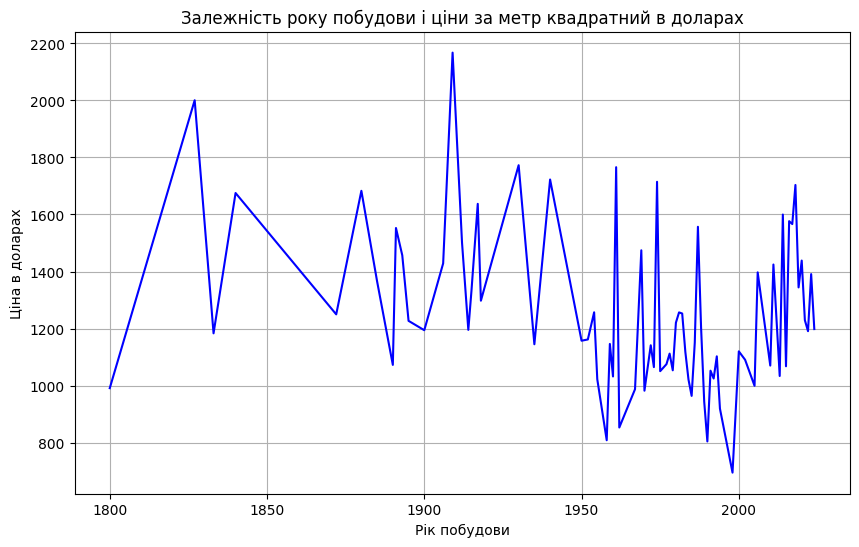

In [14]:
import pandas as pd


average_prices = df.groupby('year_of_completion')['average_price_per_sqm'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_prices.index, average_prices.values, 'b-')
plt.xlabel('Рік побудови')
plt.ylabel('Ціна в доларах')
plt.title('Залежність року побудови і ціни за метр квадратний в доларах')
plt.grid(True)
plt.show()

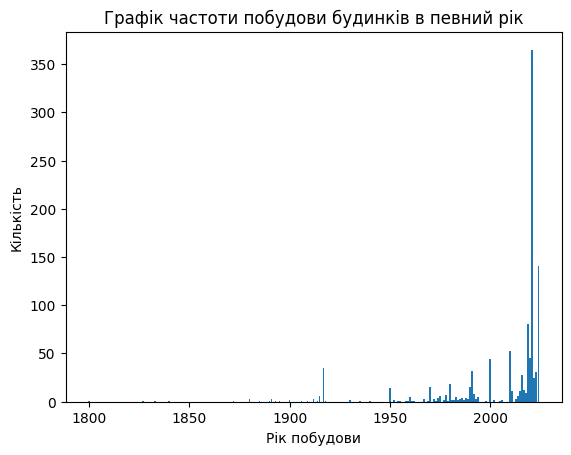

In [19]:
frequency = df['year_of_completion'].value_counts()


plt.bar(frequency.index, frequency.values)
plt.xlabel('Рік побудови')
plt.ylabel('Кількість')
plt.title('Графік частоти побудови будинків в певний рік')

plt.show()

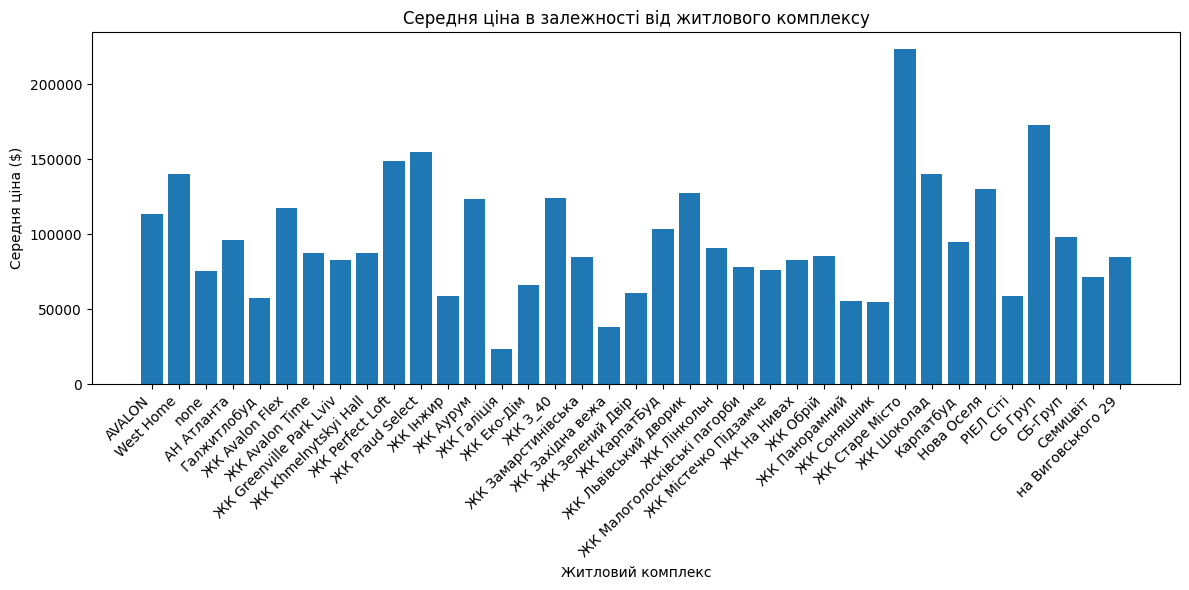

In [25]:
average_price = df.groupby('residential_complex')['cost_in_dollars'].mean()


plt.figure(figsize=(12, 6))
plt.bar(average_price.index, average_price.values)
plt.xlabel('Житловий комплекс')
plt.ylabel('Середня ціна ($)')
plt.title('Середня ціна в залежності від житлового комплексу')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

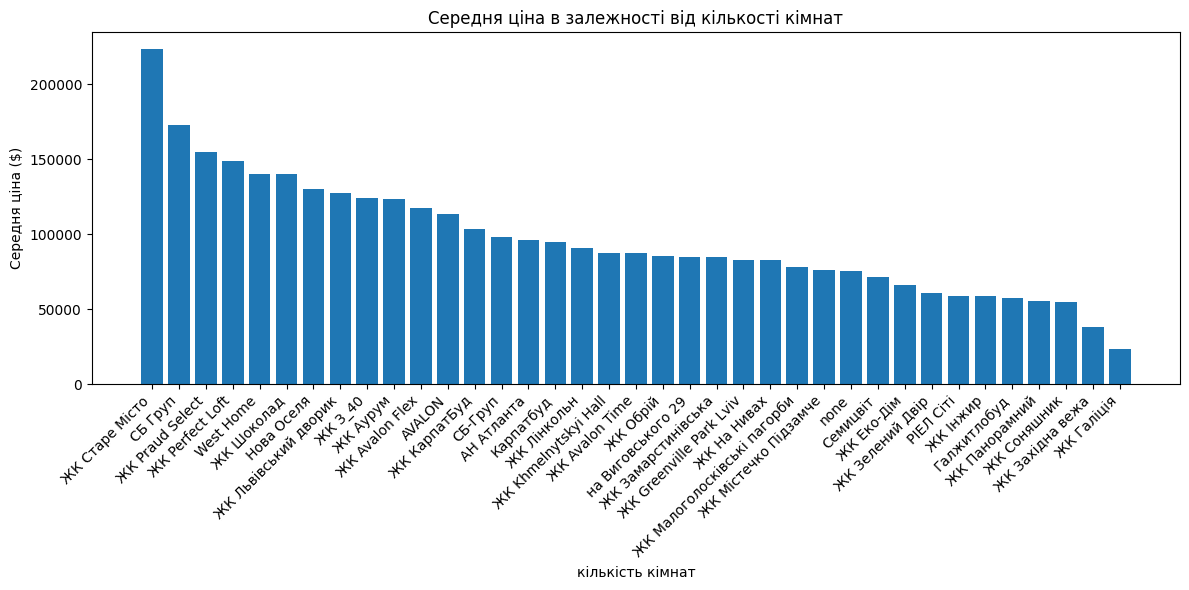

In [23]:
average_price = df.groupby('residential_complex')['cost_in_dollars'].mean()


average_price = average_price.sort_values(ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(average_price.index, average_price.values)
plt.xlabel('кількість кімнат')
plt.ylabel('Середня ціна ($)')
plt.title('Середня ціна в залежності від кількості кімнат')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

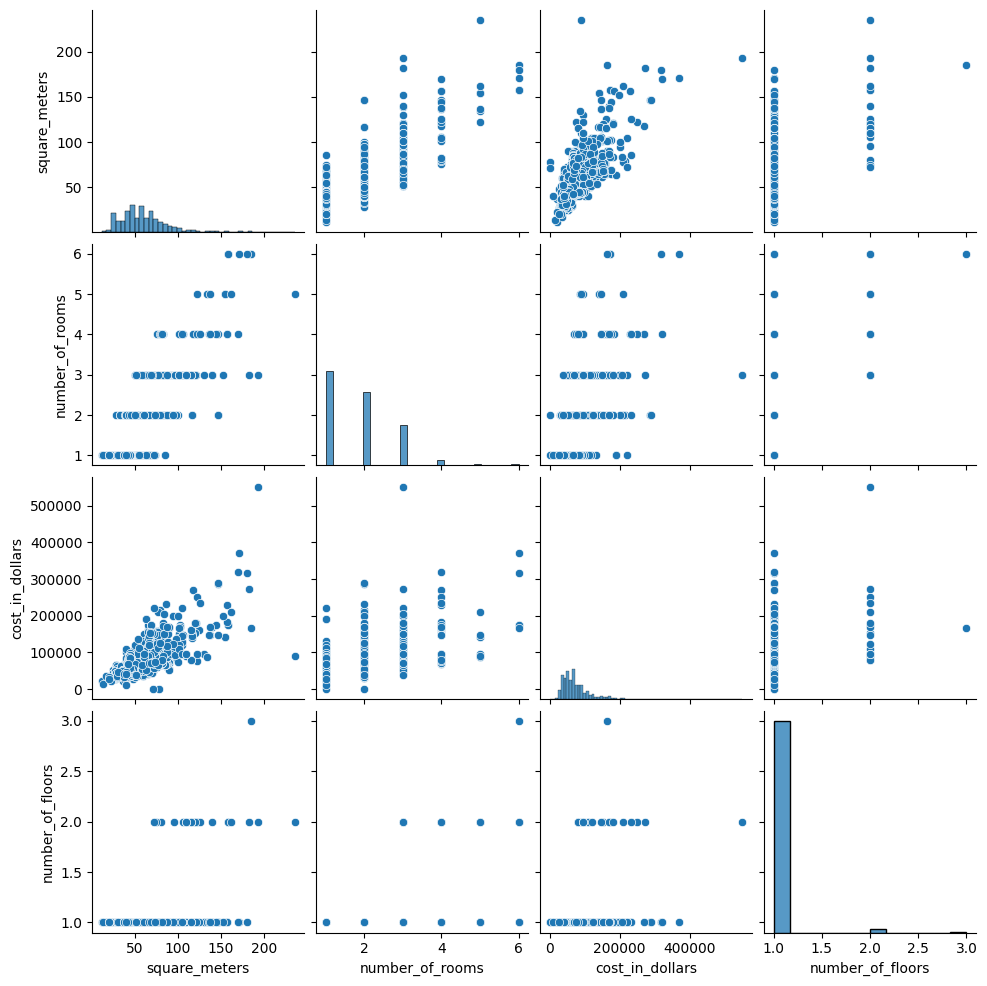

In [24]:
sns.pairplot(df[['square_meters', 'number_of_rooms', 'cost_in_dollars', 'number_of_floors']])
plt.show()

<Axes: >

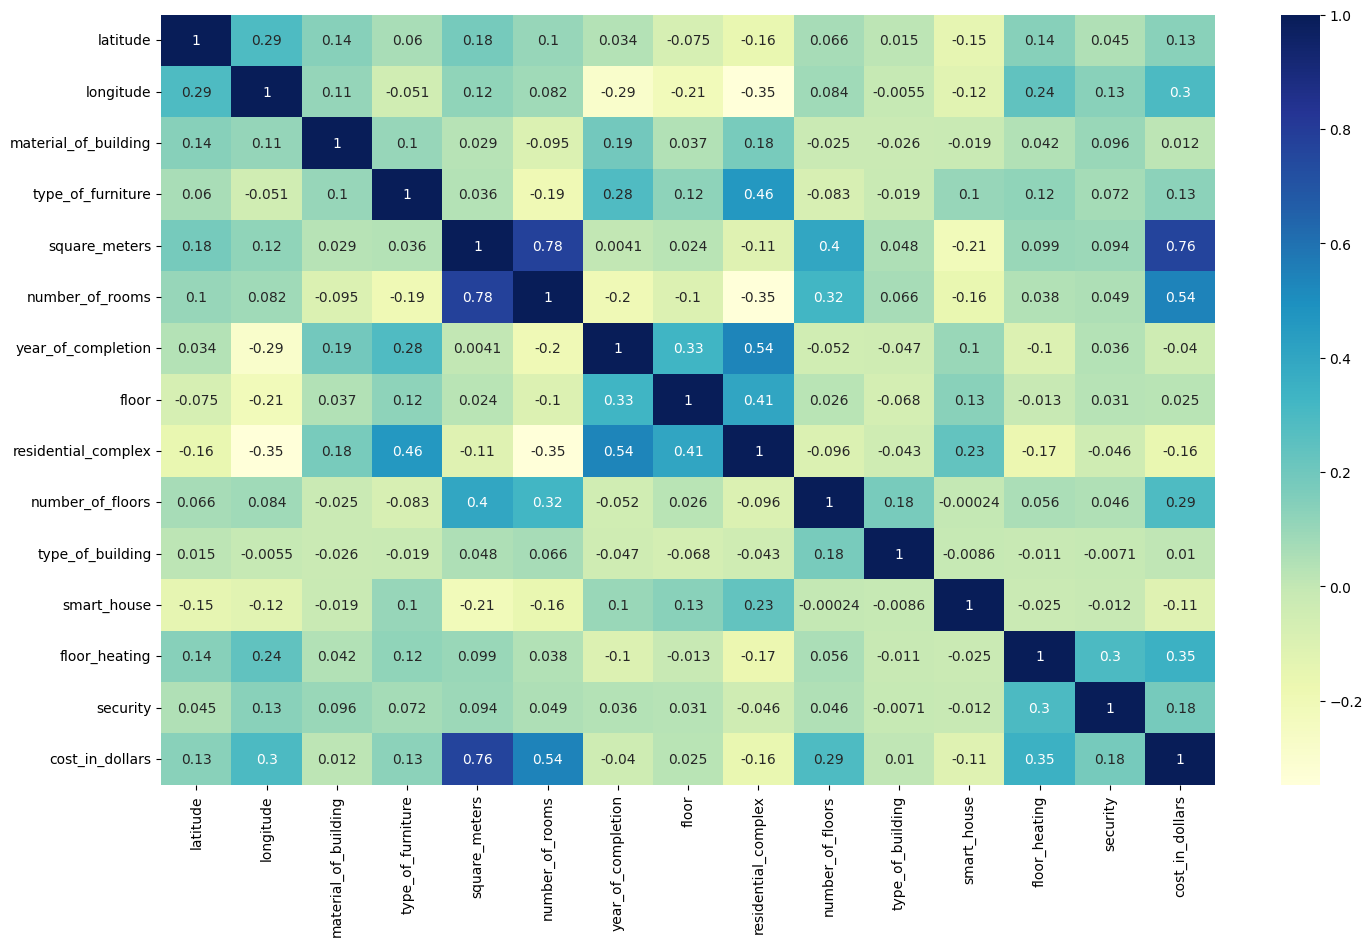

In [33]:
fig, ax = plt.subplots(figsize=(17,10))
sns.heatmap(df.corr(), annot=True,cmap = "YlGnBu")

In [6]:
X = df.drop(["cost_in_dollars"], axis=1)
y = df["cost_in_dollars"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [8]:
rfr = RandomForestRegressor()
scores = cross_val_score(rfr, X_train_s, y_train, cv=5)
print("Cross-validated scores:", scores)
print("Average score:", np.mean(scores))

Cross-validated scores: [0.92768474 0.68218657 0.76489615 0.8272253  0.82828945]
Average score: 0.8060564401675127


In [9]:
rfr.fit(X_train_s, y_train)
score = rfr.score(X_test_s, y_test)
print("Model score:", score)

Model score: 0.8113163158885117


In [10]:
latitude = float(input("Enter the latitude of the location: "))
longitude = float(input("Enter the longitude of the location: "))
material_of_building = input("Enter the material of the building: ")
type_of_furniture = input("Enter the type of furniture: ")
square_meters = float(input("Enter the square meters: "))
number_of_rooms = int(input("Enter the number of rooms: "))
year_of_completion = int(input("Enter the year of completion: "))
floor = int(input("Enter the floor of the house: "))
residential_complex = input("Enter the name of the residential complex: ")
number_of_floors = int(input("Enter the number of floors: "))
type_of_building = input("Enter the type of building: ")
smart_house = input("Is this house a Smart house (Yes/No): ")
floor_heating = input("Does this house have floor heating (Yes/No): ")
security = input("Does this house have any kind of security (Yes/No): ")

Enter the latitude of the location: 49.82663
Enter the longitude of the location: 24.03736
Enter the material of the building: brick house
Enter the type of furniture: medium-good
Enter the square meters: 65
Enter the number of rooms: 2
Enter the year of completion: 1980
Enter the floor of the house: 2
Enter the name of the residential complex: none
Enter the number of floors: 1
Enter the type of building: apartment
Is this house a Smart house (Yes/No): No
Does this house have floor heating (Yes/No): No
Does this house have any kind of security (Yes/No): No


In [14]:
new_house = pd.DataFrame({
    "latitude": [latitude],
    "longitude": [longitude],
    "material_of_building": [material_of_building],
    "type_of_furniture": [type_of_furniture],
    "square_meters": [square_meters],
    "number_of_rooms": [number_of_rooms],
    "year_of_completion": [year_of_completion],
    "floor": [floor],
    "residential_complex": [residential_complex],
    "number_of_floors": [number_of_floors],
    "type_of_building": [type_of_building],
    "smart_house": [smart_house],
    "floor_heating": [floor_heating],
    "security": [security]
})

In [15]:
new_house_transformed = new_house.copy()

for col in new_house_transformed.columns:
    if new_house_transformed[col].dtype == 'object':
        if col not in label_encoders_storage:
            label_encoders_storage[col] = LabelEncoder()
            label_encoders_storage[col].fit(df[col].unique())
        new_house_transformed[col] = label_encoders_storage[col].transform(new_house_transformed[col])

In [16]:
new_house_scaled = scaler.transform(new_house_transformed)

price = rfr.predict(new_house_scaled)
print("The predicted price for the house is:", price[0])

The predicted price for the house is: 70022.5
